<a href="https://colab.research.google.com/github/AnnamVarshini/data-analysis-using-python/blob/main/Dap_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter fail & borderline thresholds: 40 50

Frequency:
 Pass          4
Fail          3
Borderline    3
Name: count, dtype: int64

Percentages:
 Pass          40.0
Fail          30.0
Borderline    30.0
Name: proportion, dtype: float64

Mean: 52.3
Median: 46.0
StdDev: 19.499572644889767
Students at risk: 6


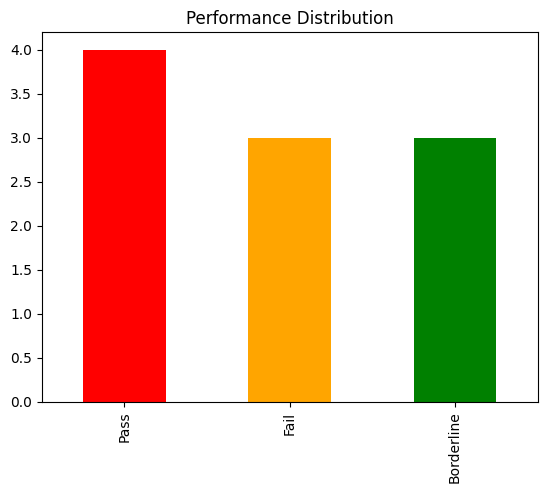

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marks = [35, 42, 77, 64, 29, 48, 56, 38, 90, 44]

def classify(m, f=40, b=50):
    if m < f:
        return "Fail"
    elif m < b:
        return "Borderline"
    else:
        return "Pass"

# Ask user for thresholds
f, b = map(int, input("Enter fail & borderline thresholds: ").split())

# Classify marks
cats = pd.Series(
    [classify(m, f, b) for m in marks],
    dtype=pd.CategoricalDtype(["Fail", "Borderline", "Pass"], ordered=True)
)

# Frequency & percentages
print("\nFrequency:\n", cats.value_counts())
print("\nPercentages:\n", cats.value_counts(normalize=True) * 100)

# Statistics
print("\nMean:", np.mean(marks))
print("Median:", np.median(marks))
print("StdDev:", np.std(marks, ddof=1))
print("Students at risk:", cats.isin(["Fail", "Borderline"]).sum())

# Plot
cats.value_counts().plot(kind="bar", color=["red", "orange", "green"])
plt.title("Performance Distribution")
plt.show()

1) Original Score Matrix:
            Mathematics  Science  English
Student 1         78.0     82.0     74.0
Student 2         91.0     76.0     88.0
Student 3         65.0     89.0     80.0 

2) Bonus Marks Matrix:
            Mathematics  Science  English
Student 1          4.0      3.0      5.0
Student 2          2.0      1.0      3.0
Student 3          5.0      4.0      2.0 

3) Final Scores with Bonuses (Before Penalty):
            Mathematics  Science  English
Student 1         82.0     85.0     79.0
Student 2         93.0     77.0     91.0
Student 3         70.0     93.0     82.0 

4) Final Adjusted Scores (After 5% Penalty):
            Mathematics  Science  English
Student 1        77.90    80.75    75.05
Student 2        88.35    73.15    86.45
Student 3        66.50    88.35    77.90 

5) Transposed Final Adjusted Scores (Subjects x Students):
              Student 1  Student 2  Student 3
Mathematics      77.90      88.35      66.50
Science          80.75      73.15      88

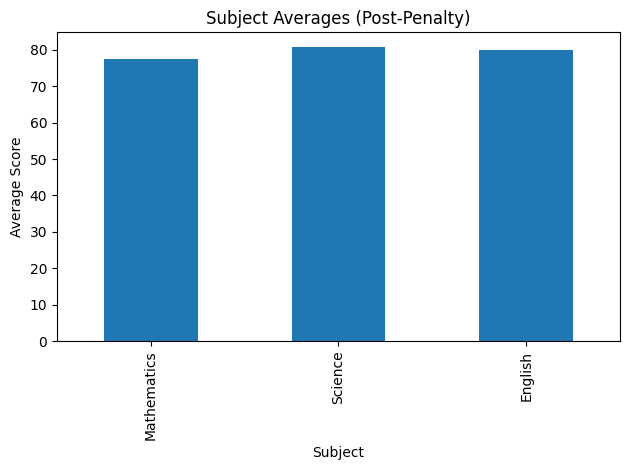

✅ All results exported to student_performance_matrices.xlsx


In [4]:
# Student Test Performance Analytics - Matrix Operations and Insights

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Create the Original Score Matrix (averages across 3 unit tests, out of 100)
# -----------------------------
students = ["Student 1", "Student 2", "Student 3"]
subjects = ["Mathematics", "Science", "English"]

original = np.array([
    [78, 82, 74],   # Student 1
    [91, 76, 88],   # Student 2
    [65, 89, 80]    # Student 3
], dtype=float)

df_original = pd.DataFrame(original, index=students, columns=subjects)
print("1) Original Score Matrix:\n", df_original, "\n")

# -----------------------------
# 2) Design the Bonus Marks Matrix
# -----------------------------
bonus = np.array([
    [4, 3, 5],   # Student 1
    [2, 1, 3],   # Student 2
    [5, 4, 2]    # Student 3
], dtype=float)

df_bonus = pd.DataFrame(bonus, index=students, columns=subjects)
print("2) Bonus Marks Matrix:\n", df_bonus, "\n")

# -----------------------------
# 3) Final Scores with Bonuses
# -----------------------------
final_pre_penalty = original + bonus
df_final_pre_penalty = pd.DataFrame(final_pre_penalty, index=students, columns=subjects)
print("3) Final Scores with Bonuses (Before Penalty):\n", df_final_pre_penalty, "\n")

# -----------------------------
# 4) Apply 5% Penalty (0.95 multiplier) to all final scores
# -----------------------------
adjusted = final_pre_penalty * 0.95
df_adjusted = pd.DataFrame(np.round(adjusted, 2), index=students, columns=subjects)
print("4) Final Adjusted Scores (After 5% Penalty):\n", df_adjusted, "\n")

# -----------------------------
# 5) Transpose the Final Scores Matrix
# Rows -> subjects, Columns -> students
# -----------------------------
df_adjusted_T = df_adjusted.T
print("5) Transposed Final Adjusted Scores (Subjects x Students):\n", df_adjusted_T, "\n")

# -----------------------------
# 6) Interpret the Results
#    a) Subject with highest average (post-penalty)
#    b) Student who improved most due to bonus (pre-penalty difference)
# -----------------------------
subject_avgs = df_adjusted_T.mean(axis=1)
subject_with_max_avg = subject_avgs.idxmax()
max_avg_value = subject_avgs.max()

# Improvement due to bonus (absolute points before penalty)
original_totals = df_original.sum(axis=1)
final_totals = df_final_pre_penalty.sum(axis=1)
absolute_improvement = final_totals - original_totals  # equals per-student sum of bonus marks
student_most_improved = absolute_improvement.idxmax()
max_improvement_value = absolute_improvement.max()

print("Subject Averages (Post-Penalty):\n", np.round(subject_avgs, 2), "\n")
print(f"📌 Subject with highest average: {subject_with_max_avg} ({max_avg_value:.2f})")
print(f"📌 Student most improved due to bonuses: {student_most_improved} (+{max_improvement_value:.2f})\n")

# -----------------------------
# Visualization
# -----------------------------
subject_avgs.plot(kind="bar", title="Subject Averages (Post-Penalty)")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

# -----------------------------
# Export all data to Excel
# -----------------------------
output_path = "student_performance_matrices.xlsx"
with pd.ExcelWriter(output_path, engine="xlsxwriter") as writer:
    df_original.to_excel(writer, sheet_name="Original Scores")
    df_bonus.to_excel(writer, sheet_name="Bonus Marks")
    df_final_pre_penalty.to_excel(writer, sheet_name="Final (Pre-Penalty)")
    df_adjusted.to_excel(writer, sheet_name="Final Adjusted (5% Penalty)")
    df_adjusted_T.to_excel(writer, sheet_name="Transposed (Adjusted)")
    subject_avgs.to_frame("Subject Average (Post-Penalty)").to_excel(writer, sheet_name="Subject Averages")

print(f"✅ All results exported to {output_path}")

In [3]:
%pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ PART 1: Phishing Email Detection ------------------

csv_link = "/content/emails.csv"
df = pd.read_csv(csv_link)

# Drop non-numeric column
df = df.drop(columns=["Email No."])

# Extract features
x = df["account"]
y = df["login"]
labels = df["Prediction"]  # 1 = spam, 0 = non-spam

# Scatter plot for phishing detection
plt.figure(figsize=(8,6))
plt.scatter(x[labels==0], y[labels==0], c="blue", marker="o", label="Non-Spam")
plt.scatter(x[labels==1], y[labels==1], c="red", marker="*", label="Spam")

plt.xlabel("Count of 'account'")
plt.ylabel("Count of 'login'")
plt.title("Account & Login Word Frequency in Spam vs Non-Spam Emails")
plt.legend()
plt.show()

# ------------------ PART 2: Study Hours vs Test Scores Simulation ------------------

# Create a small dataset
study_data = {
    "Hours_Studied": [2, 4, 5, 7, 8, 10, 12],
    "Test_Score": [50, 60, 65, 75, 80, 85, 95]
}
study_df = pd.DataFrame(study_data)

# Scatter plot for study hours vs test scores
plt.figure(figsize=(8,6))

# Red markers for high scores, blue for others
for i in range(len(study_df)):
    if study_df["Test_Score"][i] >= 80:
        plt.scatter(study_df["Hours_Studied"][i], study_df["Test_Score"][i],
                    color="red", marker="*", label="High Score" if i == 4 else "")
    else:
        plt.scatter(study_df["Hours_Studied"][i], study_df["Test_Score"][i],
                    color="blue", marker="o", label="Normal Score" if i == 0 else "")

plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Study Hours vs Test Scores")
plt.legend()
plt.show()

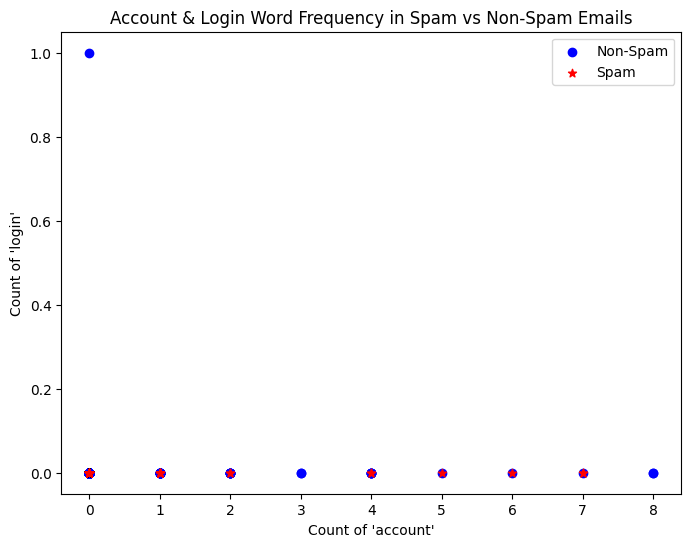

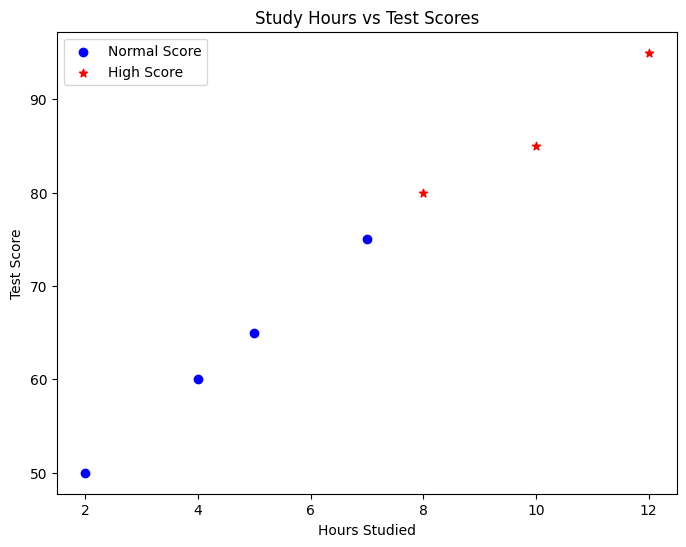

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ PART 1: Phishing Email Detection ------------------

csv_link = "/content/emails.csv"
df = pd.read_csv(csv_link)

# Drop non-numeric column
df = df.drop(columns=["Email No."])

# Extract features
x = df["account"]
y = df["login"]
labels = df["Prediction"]  # 1 = spam, 0 = non-spam

# Scatter plot for phishing detection
plt.figure(figsize=(8,6))
plt.scatter(x[labels==0], y[labels==0], c="blue", marker="o", label="Non-Spam")
plt.scatter(x[labels==1], y[labels==1], c="red", marker="*", label="Spam")

plt.xlabel("Count of 'account'")
plt.ylabel("Count of 'login'")
plt.title("Account & Login Word Frequency in Spam vs Non-Spam Emails")
plt.legend()
plt.show()

# ------------------ PART 2: Study Hours vs Test Scores Simulation ------------------

# Create a small dataset
study_data = {
    "Hours_Studied": [2, 4, 5, 7, 8, 10, 12],
    "Test_Score": [50, 60, 65, 75, 80, 85, 95]
}
study_df = pd.DataFrame(study_data)

# Scatter plot for study hours vs test scores
plt.figure(figsize=(8,6))

# Red markers for high scores, blue for others
for i in range(len(study_df)):
    if study_df["Test_Score"][i] >= 80:
        plt.scatter(study_df["Hours_Studied"][i], study_df["Test_Score"][i],
                    color="red", marker="*", label="High Score" if i == 4 else "")
    else:
        plt.scatter(study_df["Hours_Studied"][i], study_df["Test_Score"][i],
                    color="blue", marker="o", label="Normal Score" if i == 0 else "")

plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Study Hours vs Test Scores")
plt.legend()
plt.show()

       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
Index(['DATE', 'IPG2211A2N'], dtype='object')


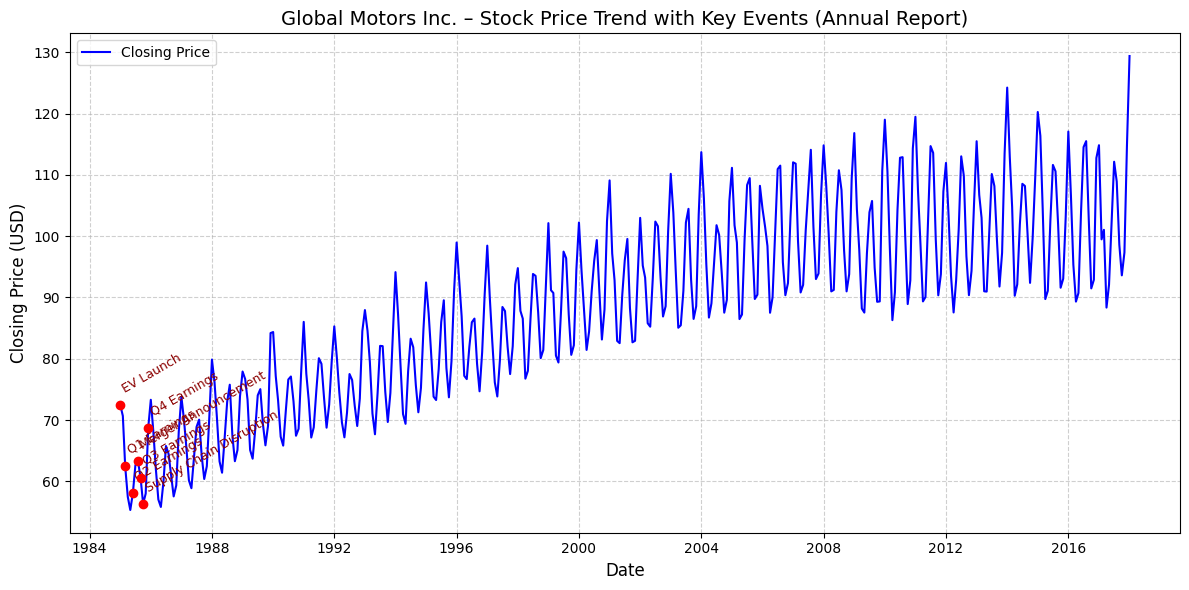

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Load Dataset
# -------------------------------
# Dataset link: https://www.kaggle.com/datasets/shenba/time-series-datasets
# Suppose file is saved locally as "time_series_data.csv"
file_path = "/content/Electric_Production.csv"

# Read CSV
df = pd.read_csv(file_path)

# Inspect data
print(df.head())
print(df.columns)

# Assuming dataset has a column "DATE" and "IPG2211A2N"
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Sort by DATE (if not already sorted)
df = df.sort_values('DATE')

# Rename 'IPG2211A2N' to 'Closing Price' for clarity
df.rename(columns={'IPG2211A2N': 'Closing Price'}, inplace=True)


# -------------------------------
# Step 2: Plot Stock Price Trend
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['Closing Price'], label="Closing Price", color="blue")

# Add grid
plt.grid(True, linestyle="--", alpha=0.6)

# -------------------------------
# Step 3: Annotate Key Events
# --------------------------------
# Define key events - Using dates within the dataset range
events = {
    "1985-01-01": "EV Launch",
    "1985-03-01": "Q1 Earnings",
    "1985-06-01": "Q2 Earnings",
    "1985-09-01": "Q3 Earnings",
    "1985-12-01": "Q4 Earnings",
    "1985-08-01": "Merger Announcement",
    "1985-10-01": "Supply Chain Disruption"
}

# Annotate events on plot
for date, label in events.items():
    d = pd.to_datetime(date)
    # Ensure the date exists in the dataframe index before trying to access it
    if d in df['DATE'].values:
        price = df.loc[df['DATE'] == d, 'Closing Price'].values[0]
        plt.scatter(d, price, color="red", zorder=5)
        plt.text(d, price + 2, label, fontsize=9, rotation=30, color="darkred")

# -------------------------------
# Step 4: Customize & Present
# -------------------------------
plt.title("Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

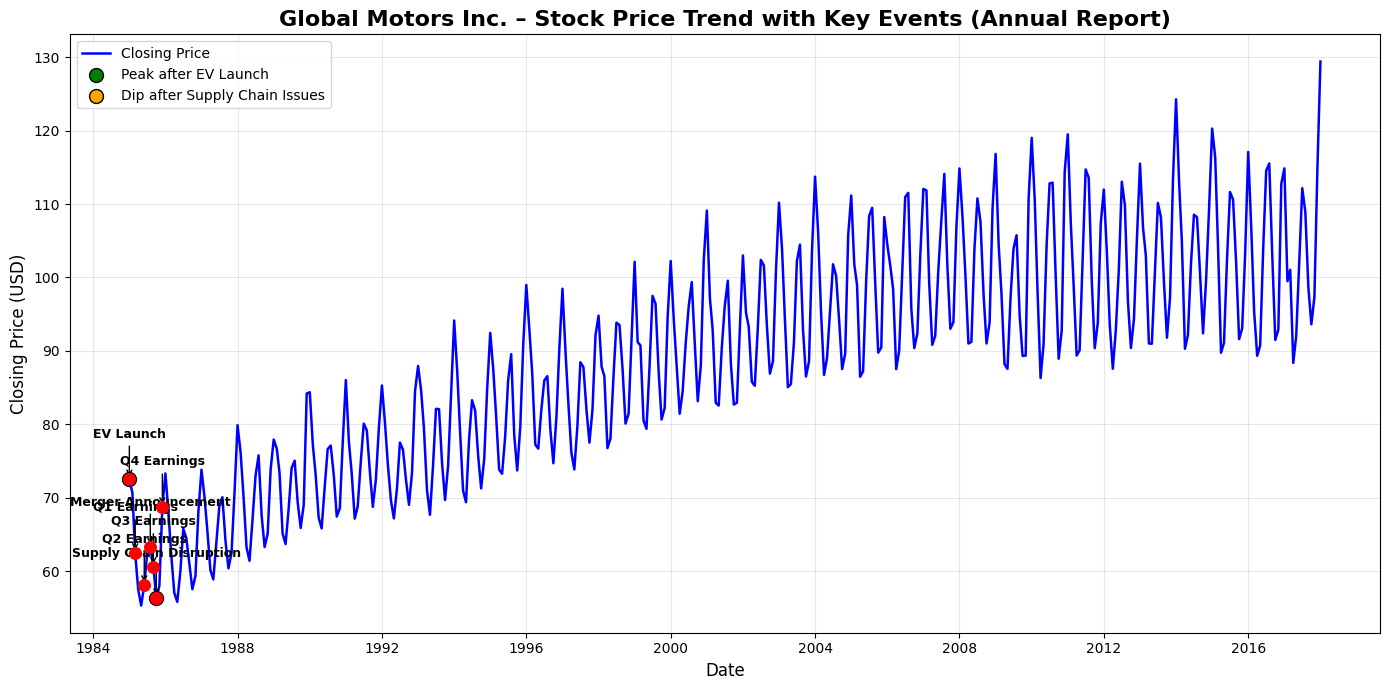

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# Changed file path to "/content/Electric_Production.csv" to match the intended data structure
df = pd.read_csv("/content/Electric_Production.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Rename column (pretend it’s stock prices)
df.rename(columns={'IPG2211A2N': 'Closing Price'}, inplace=True)

# Plot stock price trend
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Closing Price'], label="Closing Price", color="blue", linewidth=1.8)

# Add gridlines
plt.grid(alpha=0.3)

# Title & labels
plt.title("Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)", fontsize=16, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)

# Key events (use dates that fall inside dataset range)
events = {
    "1985-01-01": "EV Launch",
    "1985-03-01": "Q1 Earnings",
    "1985-06-01": "Q2 Earnings",
    "1985-09-01": "Q3 Earnings",
    "1985-12-01": "Q4 Earnings",
    "1985-08-01": "Merger Announcement",
    "1985-10-01": "Supply Chain Disruption"
}

# Annotating events
for date, event in events.items():
    if pd.to_datetime(date) in df.index:
        price = df.loc[date, 'Closing Price']
        plt.scatter(pd.to_datetime(date), price, color="red", s=70, zorder=5)
        plt.annotate(event,
                     (pd.to_datetime(date), price),
                     xytext=(0, 30), textcoords="offset points",
                     arrowprops=dict(facecolor='black', arrowstyle="->"),
                     ha='center', fontsize=9, weight="bold")

# Highlight important points (peak & dip)
ev_date = pd.to_datetime("1985-01-01")
sc_date = pd.to_datetime("1985-10-01")

if ev_date in df.index and sc_date in df.index:
    plt.scatter(ev_date, df.loc[ev_date, 'Closing Price'], color="green", s=100, edgecolors="black", label="Peak after EV Launch")
    plt.scatter(sc_date, df.loc[sc_date, 'Closing Price'], color="orange", s=100, edgecolors="black", label="Dip after Supply Chain Issues")


# Legend
plt.legend()
plt.tight_layout()
plt.show()

Dataset shape: (590, 5)
   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...  

Patient count by gender:
gender
0    590
Name: count, dtype: int64


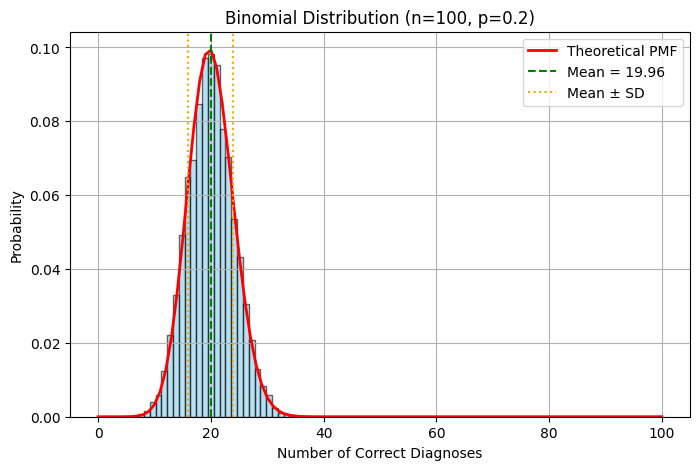

p = 0.2
Simulated Mean: 19.96, Variance: 16.13
Theoretical Mean: 20.00, Variance: 16.00
----------------------------------------


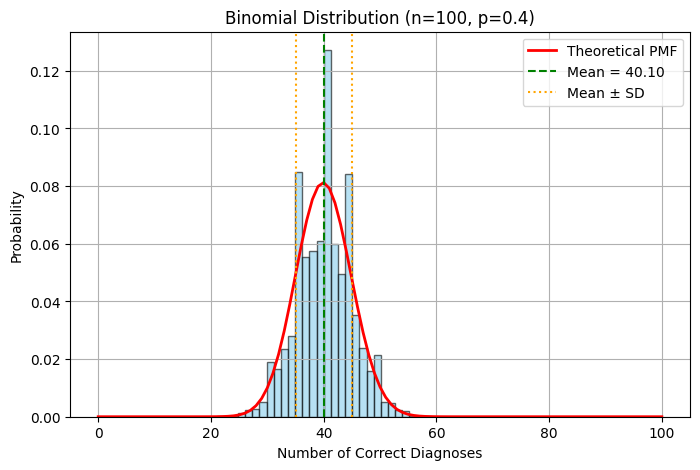

p = 0.4
Simulated Mean: 40.10, Variance: 24.43
Theoretical Mean: 40.00, Variance: 24.00
----------------------------------------


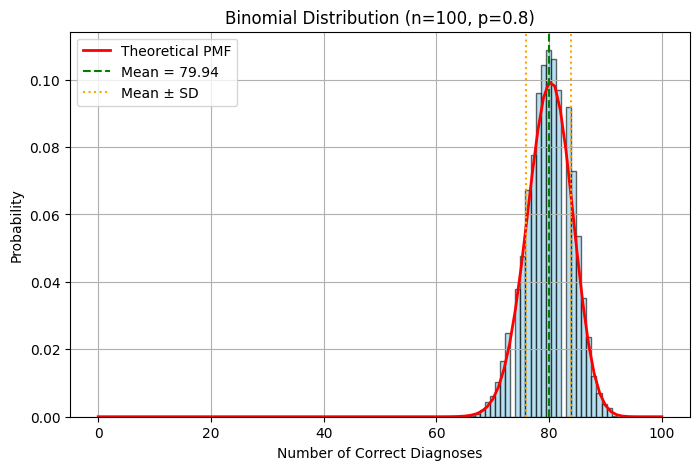

p = 0.8
Simulated Mean: 79.94, Variance: 16.09
Theoretical Mean: 80.00, Variance: 16.00
----------------------------------------


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
file_path = "/content/age_gender.csv"

df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
print(df.head())

print("\nPatient count by gender:")
print(df['gender'].value_counts())

# -------------------------------
# Task 1: Simulation
# -------------------------------
def simulate_diagnosis(n=100, p=0.4, trials=10000):
    """
    Simulate number of correctly diagnosed patients
    n = number of patients
    p = probability of correct diagnosis
    trials = number of simulations
    """
    results = np.random.binomial(n, p, trials)
    return results

# -------------------------------
# Task 2: Visualization & Metrics
# -------------------------------
def plot_distribution(results, n, p):
    mean = np.mean(results)
    var = np.var(results)

    # Plot histogram of simulated results
    plt.figure(figsize=(8, 5))
    plt.hist(results, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black")

    # Overlay theoretical binomial PMF
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    plt.plot(x, pmf, 'r-', lw=2, label="Theoretical PMF")

    # Mark mean & variance
    plt.axvline(mean, color="green", linestyle="--", label=f"Mean = {mean:.2f}")
    plt.axvline(mean + np.sqrt(var), color="orange", linestyle=":", label="Mean ± SD")
    plt.axvline(mean - np.sqrt(var), color="orange", linestyle=":")

    plt.title(f"Binomial Distribution (n={n}, p={p})")
    plt.xlabel("Number of Correct Diagnoses")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"p = {p}")
    print(f"Simulated Mean: {mean:.2f}, Variance: {var:.2f}")
    print(f"Theoretical Mean: {n*p:.2f}, Variance: {n*p*(1-p):.2f}")
    print("-"*40)

# -------------------------------
# Task 3: Comparative Analysis
# -------------------------------
n = 100
p_values = [0.2, 0.4, 0.8]

for p in p_values:
    results = simulate_diagnosis(n, p, trials=10000)
    plot_distribution(results, n, p)